In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', 200)
pd.set_option("display.max_columns", 999)
import uproot
import os
from multiprocessing import Pool
import psutil

import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())

2025-10-19 18:47:27.992649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-19 18:47:28.172910: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.10.0
True


In [2]:
def make_training_and_testing_pd(Mass):
    TrainingRows = 100000
    TestingRows = 50000
    File = "ML_TTree_test/tree_ML_MCRun2_" + str(Mass) + "GeV.root"
    
    print("Processing file: " + File + "\n")
    Events = uproot.open(File)["tree_ML"]
    DF = Events.arrays(library="pd")
    
    TrainingDF = DF.loc[0:TrainingRows-1]
    TestingDF = DF.loc[TrainingRows:TrainingRows+TestingRows-1]
    
    return [TrainingDF, TestingDF]

In [3]:
Masses = [500, 600, 700, 800, 900, 1000, 1250, 1500, 1750, 2000, 2500, 3000]

SanityCheckPlots = False

In [4]:
#multithreading and memory monitoring in case large input files in the future
Mem0 = psutil.virtual_memory().available

TrainingDF = None
TestingDF = None
with Pool(processes=6) as pool:
    DFarray = pool.map(make_training_and_testing_pd, Masses)
    TrainingDF =pd.concat([row[0] for row in DFarray], ignore_index=True)
    TestingDF = pd.concat([row[1] for row in DFarray], ignore_index=True)

Mem1 = psutil.virtual_memory().available
print("Memory used: " + str((Mem0 - Mem1)/(1024**3)) + "GB")

Processing file: ML_TTree_test/tree_ML_MCRun2_500GeV.root
Processing file: ML_TTree_test/tree_ML_MCRun2_700GeV.root
Processing file: ML_TTree_test/tree_ML_MCRun2_600GeV.root
Processing file: ML_TTree_test/tree_ML_MCRun2_800GeV.root
Processing file: ML_TTree_test/tree_ML_MCRun2_900GeV.root
Processing file: ML_TTree_test/tree_ML_MCRun2_1000GeV.root






Processing file: ML_TTree_test/tree_ML_MCRun2_1250GeV.root

Processing file: ML_TTree_test/tree_ML_MCRun2_1500GeV.root

Processing file: ML_TTree_test/tree_ML_MCRun2_1750GeV.root

Processing file: ML_TTree_test/tree_ML_MCRun2_2000GeV.root

Processing file: ML_TTree_test/tree_ML_MCRun2_2500GeV.root

Processing file: ML_TTree_test/tree_ML_MCRun2_3000GeV.root

Memory used: 2.341014862060547GB


In [5]:
#remove a mass point in training and check its performace in testing
#TrainingDF = TrainingDF.loc[TrainingDF["Mass"] != 3000]
TrainingDF

,Mass,fourjetmasstev,Truth_QSMD,dRi,pt_ordered_jet1_pt,pt_ordered_jet1_eta,pt_ordered_jet1_phi,pt_ordered_jet1_m,pt_ordered_jet2_pt,pt_ordered_jet2_eta,pt_ordered_jet2_phi,pt_ordered_jet2_m,pt_ordered_jet3_pt,pt_ordered_jet3_eta,pt_ordered_jet3_phi,pt_ordered_jet3_m,pt_ordered_jet4_pt,pt_ordered_jet4_eta,pt_ordered_jet4_phi,pt_ordered_jet4_m,pt_ordered_jet1_px,pt_ordered_jet1_py,pt_ordered_jet1_pz,pt_ordered_jet1_E,pt_ordered_jet2_px,pt_ordered_jet2_py,pt_ordered_jet2_pz,pt_ordered_jet2_E,pt_ordered_jet3_px,pt_ordered_jet3_py,pt_ordered_jet3_pz,pt_ordered_jet3_E,pt_ordered_jet4_px,pt_ordered_jet4_py,pt_ordered_jet4_pz,pt_ordered_jet4_E,P1high_Mjj_div_M4j,P1low_Mjj_div_M4j,P2high_Mjj_div_M4j,P2low_Mjj_div_M4j,P3high_Mjj_div_M4j,P3low_Mjj_div_M4j,P1high_dR,P1low_dR,P2high_dR,P2low_dR,P3high_dR,P3low_dR
0,500,0.847046,0,1,306.839386,-0.539185,1.382568,33.485954,202.635849,-0.365173,-1.961670,25.513584,125.062645,-0.557007,2.890137,18.871059,89.855881,-2.161133,-0.051529,17.076536,57.415312,301.419792,-173.576665,354.119438,-77.203502,-187.352359,-75.652818,217.797105,-121.129574,31.117383,-73.319160,146.193301,89.736613,-4.628129,-384.842469,395.562148,0.592137,0.337858,0.442442,0.254717,0.420953,0.322698,2.944094,3.350614,2.165029,1.444176,2.621852,1.507674
1,500,0.989199,1,2,281.767273,-0.650879,-2.458008,31.922838,249.007187,0.175537,0.082794,30.908777,228.222305,0.426880,-3.013184,17.132305,147.014023,0.036758,0.690430,19.644115,-218.458000,-177.957575,-196.622557,345.068535,248.154217,20.592803,43.934823,254.735550,-226.343323,-29.225341,100.409444,249.921974,113.343759,93.628603,5.405221,148.419105,0.563587,0.365279,0.488279,0.439262,0.325986,0.129350,2.671823,2.608905,3.106163,3.209282,1.212347,0.623282
2,500,1.437438,2,2,352.611542,0.773682,-1.982666,29.824646,300.181458,0.102753,1.098877,57.910728,212.219910,0.038391,-0.279114,12.978419,164.810455,-1.678955,2.421387,19.934750,-141.158637,-323.124030,300.851841,464.474153,136.461501,267.370840,30.898756,307.273971,204.006994,-58.467397,8.149360,212.772511,-123.883062,108.699002,-426.313844,457.496857,0.589512,0.230064,0.483189,0.358433,0.372651,0.321537,3.089752,1.379493,3.153736,3.200309,2.218899,1.855463
3,500,1.372216,1,0,570.987061,0.163818,-2.839844,31.241617,514.658813,0.193359,1.086914,30.595160,142.110779,0.331055,-1.069336,22.435198,122.445961,-0.483154,-0.718750,12.957661,-545.188833,-169.691956,93.957097,579.508583,239.429180,455.573663,100.135370,525.201723,68.313595,-124.614310,47.910521,151.638483,92.156427,-80.623857,-61.489018,137.629262,0.731474,0.091073,0.360959,0.350978,0.326251,0.315402,2.356613,0.886480,2.217569,2.160642,1.778389,1.928236
4,500,1.131831,1,2,293.512054,-2.429199,-0.152832,42.844475,220.898056,-2.050781,-2.927246,42.656178,208.089432,-0.861084,2.636719,25.697979,144.115829,-0.657349,-0.480774,18.849066,290.090849,-44.683618,-1652.719766,1679.127035,-215.842936,-46.987002,-844.420127,873.876909,-182.127252,100.652251,-202.160972,291.257028,127.778466,-66.648600,-101.705839,177.394299,0.577370,0.384458,0.457564,0.310102,0.376565,0.280712,3.200090,2.815472,2.800102,3.124143,1.801944,1.390201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,3000,5.470423,2,2,2894.731689,0.096466,0.328125,77.974464,1444.436401,-0.555542,3.079102,215.850937,523.146423,-0.053452,-3.068848,41.976273,507.021729,-0.201263,2.809082,44.503277,2740.292720,932.881217,279.676668,2909.256023,-1441.616958,90.205669,-844.362745,1686.990394,-521.762831,-38.022729,-27.976298,525.572888,-479.250026,165.500593,-102.735249,519.236080,0.777138,0.043360,0.448219,0.084825,0.424968,0.096188,2.827187,0.431370,2.890104,0.445448,2.498758,0.519984
1199996,3000,5.158958,1,2,2458.162109,-0.432678,-2.746582,164.295532,1031.057251,-1.008545,0.545654,82.479607,881.092224,-0.343689,0.482117,48.013809,736.506592,-0.783691,-2.000000,66.278

In [6]:
TrainingDF.dtypes

Mass                     int32
fourjetmasstev         float64
Truth_QSMD               int32
dRi                      int32
pt_ordered_jet1_pt     float32
pt_ordered_jet1_eta    float32
pt_ordered_jet1_phi    float32
pt_ordered_jet1_m      float32
pt_ordered_jet2_pt     float32
pt_ordered_jet2_eta    float32
pt_ordered_jet2_phi    float32
pt_ordered_jet2_m      float32
pt_ordered_jet3_pt     float32
pt_ordered_jet3_eta    float32
pt_ordered_jet3_phi    float32
pt_ordered_jet3_m      float32
pt_ordered_jet4_pt     float32
pt_ordered_jet4_eta    float32
pt_ordered_jet4_phi    float32
pt_ordered_jet4_m      float32
pt_ordered_jet1_px     float64
pt_ordered_jet1_py     float64
pt_ordered_jet1_pz     float64
pt_ordered_jet1_E      float64
pt_ordered_jet2_px     float64
pt_ordered_jet2_py     float64
pt_ordered_jet2_pz     float64
pt_ordered_jet2_E      float64
pt_ordered_jet3_px     float64
pt_ordered_jet3_py     float64
pt_ordered_jet3_pz     float64
pt_ordered_jet3_E      float64
pt_order

In [7]:
TrainingDF = TrainingDF.sample(frac = 1)
TrainingDF

,Mass,fourjetmasstev,Truth_QSMD,dRi,pt_ordered_jet1_pt,pt_ordered_jet1_eta,pt_ordered_jet1_phi,pt_ordered_jet1_m,pt_ordered_jet2_pt,pt_ordered_jet2_eta,pt_ordered_jet2_phi,pt_ordered_jet2_m,pt_ordered_jet3_pt,pt_ordered_jet3_eta,pt_ordered_jet3_phi,pt_ordered_jet3_m,pt_ordered_jet4_pt,pt_ordered_jet4_eta,pt_ordered_jet4_phi,pt_ordered_jet4_m,pt_ordered_jet1_px,pt_ordered_jet1_py,pt_ordered_jet1_pz,pt_ordered_jet1_E,pt_ordered_jet2_px,pt_ordered_jet2_py,pt_ordered_jet2_pz,pt_ordered_jet2_E,pt_ordered_jet3_px,pt_ordered_jet3_py,pt_ordered_jet3_pz,pt_ordered_jet3_E,pt_ordered_jet4_px,pt_ordered_jet4_py,pt_ordered_jet4_pz,pt_ordered_jet4_E,P1high_Mjj_div_M4j,P1low_Mjj_div_M4j,P2high_Mjj_div_M4j,P2low_Mjj_div_M4j,P3high_Mjj_div_M4j,P3low_Mjj_div_M4j,P1high_dR,P1low_dR,P2high_dR,P2low_dR,P3high_dR,P3low_dR
1039883,2500,5.547058,1,2,1447.679565,-0.375610,3.076660,89.914474,1352.765503,-0.742310,0.439941,141.457474,1164.551758,0.663940,-1.805420,88.452507,798.098206,-0.698608,1.189697,52.701050,-1444.628763,93.935408,-556.639903,1553.611508,1223.950598,576.124500,-1098.965429,1748.630818,-270.731394,-1132.645271,831.264360,1433.528890,296.845368,740.839776,-604.030843,1002.293074,0.535881,0.321034,0.499142,0.431436,0.396041,0.141969,2.649375,1.914408,2.662096,3.290481,1.744638,0.751028
947657,2000,3.871719,1,2,1010.018433,0.246094,-1.517578,105.856743,881.009705,0.227997,1.916016,65.517342,661.562439,0.066513,1.285400,49.333115,640.927979,-1.345459,-1.768066,81.598480,53.725996,-1008.588495,251.075711,1046.127094,-298.136367,829.031246,202.612212,906.378690,186.254565,634.802408,44.034995,664.859156,-125.617455,-628.497358,-1147.109970,1316.551658,0.505441,0.419905,0.484201,0.424834,0.373767,0.129818,3.038273,2.808725,2.849649,3.364123,1.611144,0.650963
440273,900,1.529802,0,1,255.684860,1.703369,-0.752319,21.916300,250.970657,-0.692017,0.894531,19.507956,165.501923,-1.398438,-2.834473,21.645214,128.569427,0.661011,2.927246,12.640690,186.677039,-174.718147,678.888294,725.771581,157.078637,195.735977,-187.873436,314.107082,-157.757788,-50.033656,-314.609729,356.144189,-125.627193,27.347873,91.311274,158.201244,0.649250,0.263908,0.555298,0.239168,0.273858,0.263714,3.735849,2.441846,2.906887,2.124442,2.650070,2.804523
1169834,3000,7.607647,2,0,2225.653320,-0.526367,2.081543,76.783531,1619.717041,0.054062,-0.582764,86.246445,1401.455444,1.134766,-2.316895,107.842491,701.672180,1.189941,0.265320,50.509598,-1087.963305,1941.614933,-1226.362192,2542.320326,1352.374481,-891.384628,87.607624,1624.375830,-951.278074,-1029.148866,1954.292467,2407.273647,677.119749,183.991016,1046.421096,1260.909266,0.572623,0.204466,0.507250,0.251535,0.410341,0.377220,2.512297,1.417557,2.726798,2.582804,2.498876,2.043314
1136460,3000,6.898581,1,2,2048.914307,-0.847168,1.158691,154.219360,1852.979858,0.375000,-1.590088,142.230881,1280.340820,-0.346008,-2.784180,76.634819,663.080261,-1.237793,0.917847,35.713425,820.669903,1877.378690,-1950.979453,2833.399773,-35.744662,-1852.635062,711.268297,1989.891095,-1199.429729,-447.929618,-451.901244,1359.911852,402.842435,526.681503,-1046.994325,1239.817728,0.666024,0.285207,0.449677,0.420761,0.301834,0.082863,3.008236,2.730872,2.393372,2.981751,1.394886,0.458905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896189,1750,3.110046,1,0,1112.223022,0.281677,1.441406,56.906326,905.686401,0.339233,-0.642456,50.074009,585.458801,0.743896,-2.598633,67.911766,129.758224,2.464844,3.021484,13.741362,143.509405,1102.925701,317.447203,1158.037611,725.116620,-542.654351,313.165885,959.608324,-501.259970,-302.490414,476.815141,758.107311,-128.823403,15.547592,757.568878,768.724025,0.558621,0.184197,0.484668,0.353291,0.401871,0.367393,2.084657,1.844266,2.290273,3.373227,1.997593,2.694970
200859,700,1.930442,2,2,518.533203,-0.268494,2.713379,55.686226,464.811005,0.021824,0.394287,39.054794,30

In [8]:
if SanityCheckPlots:
    plt.hist(TrainingDF["Mass"], bins = int((Masses[-1] - Masses[0])/50) + 1,
             range = [Masses[0]-25, Masses[-1]+25], rwidth = 1)
    plt.xlabel("Gen mass [GeV]")
    plt.ylabel("Events")
    plt.title("Training Sample")

In [9]:
if SanityCheckPlots:
    plt.hist(TestingDF["Mass"], bins = int((Masses[-1] - Masses[0])/50) + 1,
             range = [Masses[0]-25, Masses[-1]+25], rwidth = 1)
    plt.xlabel("Gen mass [GeV]")
    plt.ylabel("Events")
    plt.title("Testing Sample")

In [79]:
#InputList = [
#    "pt_ordered_jet1_pt", "pt_ordered_jet1_eta", "pt_ordered_jet1_phi", "pt_ordered_jet1_m",
#    "pt_ordered_jet2_pt", "pt_ordered_jet2_eta", "pt_ordered_jet2_phi", "pt_ordered_jet2_m",
#    "pt_ordered_jet3_pt", "pt_ordered_jet3_eta", "pt_ordered_jet3_phi", "pt_ordered_jet3_m",
#    "pt_ordered_jet4_pt", "pt_ordered_jet4_eta", "pt_ordered_jet4_phi", "pt_ordered_jet4_m",]

#InputList = [
#    "pt_ordered_jet1_px", "pt_ordered_jet1_py", "pt_ordered_jet1_pz", "pt_ordered_jet1_E",
#    "pt_ordered_jet2_px", "pt_ordered_jet2_py", "pt_ordered_jet2_pz", "pt_ordered_jet2_E",
#    "pt_ordered_jet3_px", "pt_ordered_jet3_py", "pt_ordered_jet3_pz", "pt_ordered_jet3_E",
#    "pt_ordered_jet4_px", "pt_ordered_jet4_py", "pt_ordered_jet4_pz", "pt_ordered_jet4_E",]

InputList = [
    "fourjetmasstev", "P1high_Mjj_div_M4j", "P1low_Mjj_div_M4j", "P1high_dR", "P1low_dR",
    "fourjetmasstev", "P2high_Mjj_div_M4j", "P2low_Mjj_div_M4j", "P2high_dR", "P2low_dR",
    "fourjetmasstev", "P3high_Mjj_div_M4j", "P3low_Mjj_div_M4j", "P3high_dR", "P3low_dR",
]

TrainingInputs = TrainingDF[InputList].to_numpy()
TrainingTruth = TrainingDF["Truth_QSMD"].to_numpy()

TestingInputs = TestingDF[InputList].to_numpy()

In [80]:
print(TrainingInputs.shape)
print(TrainingTruth.shape)
print(TestingInputs.shape)

(1200000, 15)
(1200000,)
(600000, 15)


In [103]:
NotebookName = "CNN_test"
ResultsDir = "results_temp/results_" + NotebookName + "/"
if not os.path.exists(ResultsDir):
    os.makedirs(ResultsDir)

In [104]:
def model_DNN():
    Model = tf.keras.Sequential([
        tf.keras.Input(shape=(len(InputList), ), name="model_in"),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax', name="model_out")],
        name = "ModelDNN"
    )
    Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return Model

In [105]:
def model_CNN():
    Model = tf.keras.Sequential([
        tf.keras.Input(shape=(3*5, ), name="model_in"),
        tf.keras.layers.Reshape((3,5, 1)),
        tf.keras.layers.Conv2D(32, (2,3), activation='relu'),
        tf.keras.layers.Conv2D(16, (2,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax', name="model_out")],
        name = "ModelCNNMore"
    )
    Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return Model

In [106]:
#Model = model_DNN()
Model = model_CNN()

In [107]:
Model.summary()

Model: "ModelCNNMore"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 3, 5, 1)           0         
                                                                 
 conv2d (Conv2D)             (None, 2, 3, 32)          224       
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 16)          3088      
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 model_out (Dense)           (None, 3)                 27        
                                                                 
Total params: 3,475
Trainable params: 3,475
Non-traina

In [108]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(ResultsDir + "Model.h5", save_best_only = True, monitor = "val_loss", mode = "min")

History = Model.fit(TrainingInputs, TrainingTruth, batch_size = 5000,
                    epochs = 50, validation_split = 0.2, callbacks=[checkpoint])

Epoch 1/50


2025-10-19 20:09:05.171282: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


192/192 [==============================] - 2s 5ms/step - loss: 0.7357 - accuracy: 0.6679 - val_loss: 0.5794 - val_accuracy: 0.7471
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5215 - accuracy: 0.7761 - val_loss: 0.4883 - val_accuracy: 0.7937
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 0.4761 - accuracy: 0.8000 - val_loss: 0.4695 - val_accuracy: 0.8025
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 0.4613 - accuracy: 0.8077 - val_loss: 0.4579 - val_accuracy: 0.8101
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 0.4551 - accuracy: 0.8106 - val_loss: 0.4568 - val_accuracy: 0.8075
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.4511 - accuracy: 0.8125 - val_loss: 0.4518 - val_accuracy: 0.8113
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.4488 - accuracy: 0.8138 - val_loss: 0.4483 - val_accuracy: 0.8131
Epoch 8/50
192/19

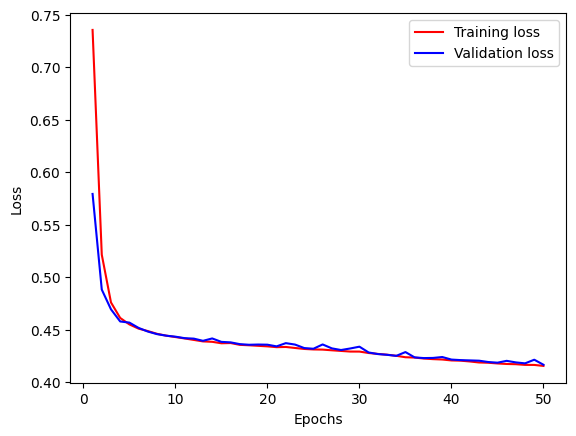

In [109]:
Loss = History.history["loss"]
ValLoss = History.history["val_loss"]
Epochs = range(1, len(Loss) + 1)

plt.plot(Epochs, Loss, "r", label="Training loss")
plt.plot(Epochs, ValLoss, "b", label="Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
    
plt.savefig(ResultsDir + "Loss_vs_Epochs.png")

In [110]:
#Model.save(ResultsDir + "Model.h5")

ModelTest = tf.keras.models.load_model(ResultsDir + "Model.h5")
TestingOutputs = ModelTest.predict(TestingInputs, batch_size = 5000)

120/120 [==============================] - 0s 1ms/step


In [111]:
TestingOutputs[0] #ML raw output is the probability of 3 sparse categories

array([0.01037082, 0.9697828 , 0.01984634], dtype=float32)

In [112]:
TestingPredictions = np.argmax(TestingOutputs, axis = 1) #pick the highest probability as ML output

In [113]:
print(TestingPredictions.shape)
print(TestingPredictions[0])

(600000,)
1


In [114]:
TestingDF["Pred"] = TestingPredictions.tolist()

In [115]:
TestingDF

,Mass,fourjetmasstev,Truth_QSMD,dRi,pt_ordered_jet1_pt,pt_ordered_jet1_eta,pt_ordered_jet1_phi,pt_ordered_jet1_m,pt_ordered_jet2_pt,pt_ordered_jet2_eta,pt_ordered_jet2_phi,pt_ordered_jet2_m,pt_ordered_jet3_pt,pt_ordered_jet3_eta,pt_ordered_jet3_phi,pt_ordered_jet3_m,pt_ordered_jet4_pt,pt_ordered_jet4_eta,pt_ordered_jet4_phi,pt_ordered_jet4_m,pt_ordered_jet1_px,pt_ordered_jet1_py,pt_ordered_jet1_pz,pt_ordered_jet1_E,pt_ordered_jet2_px,pt_ordered_jet2_py,pt_ordered_jet2_pz,pt_ordered_jet2_E,pt_ordered_jet3_px,pt_ordered_jet3_py,pt_ordered_jet3_pz,pt_ordered_jet3_E,pt_ordered_jet4_px,pt_ordered_jet4_py,pt_ordered_jet4_pz,pt_ordered_jet4_E,P1high_Mjj_div_M4j,P1low_Mjj_div_M4j,P2high_Mjj_div_M4j,P2low_Mjj_div_M4j,P3high_Mjj_div_M4j,P3low_Mjj_div_M4j,P1high_dR,P1low_dR,P2high_dR,P2low_dR,P3high_dR,P3low_dR,Pred
0,500,1.008406,1,2,323.444855,-0.492065,2.395508,10.324853,187.102036,-0.681152,-0.252747,18.437634,162.023453,-0.838257,-2.181641,16.019224,125.970573,1.190430,-0.823853,19.467037,-237.522369,219.544297,-165.656936,363.545591,181.157664,-46.787525,-137.531231,232.941962,-92.930055,-132.723789,-152.291430,222.936974,85.584330,-92.433262,187.973501,227.115803,0.551369,0.287104,0.476466,0.384741,0.352193,0.341477,3.495399,1.935281,2.654996,2.441139,1.740807,1.956778,1
1,500,0.931288,0,2,328.724823,-0.133118,1.629150,28.249788,153.106003,-1.426514,-1.527588,21.509892,147.350174,-0.015360,0.023663,25.893974,145.486725,-1.330078,-2.701172,19.203876,-19.171544,328.165295,-43.888436,332.842688,6.613413,-152.963103,-300.394862,337.847890,147.308924,3.486358,-2.263370,149.625180,-131.603270,-62.023919,-255.829836,294.930638,0.588567,0.383183,0.492893,0.339547,0.346672,0.183428,3.383422,3.025427,2.290500,2.097077,1.609801,1.177539,0
2,500,1.580551,2,1,679.437073,1.178955,1.770020,45.719189,365.241302,1.373779,-1.196777,47.497608,163.338120,-0.288330,-1.763428,22.256376,88.350540,2.364258,-0.902710,11.247879,-134.466005,665.998220,999.919191,1209.778231,133.444383,-339.990891,675.167406,769.095741,-31.269824,-160.316997,-47.750549,171.624015,54.731826,-69.355931,465.701123,474.141191,0.633874,0.275079,0.536283,0.128238,0.360801,0.303793,2.973187,2.788738,3.116727,1.033210,2.923769,1.756047,2
3,500,1.796111,2,2,559.140381,-0.676636,-2.841309,51.954700,558.328979,0.303833,0.983765,49.695019,233.688980,0.545654,-0.476379,21.861227,146.543457,1.118652,-1.770020,24.203590,-534.120250,-165.389010,-407.871662,694.043622,309.253998,464.858273,172.260866,586.408263,207.670289,-107.161516,133.935876,270.235585,-29.002117,-143.644916,200.325405,249.381367,0.668991,0.140238,0.457065,0.342307,0.366940,0.275539,2.646438,1.414861,2.662120,2.871804,2.090627,1.480033,1
4,500,0.905132,1,2,336.160828,-0.414917,0.065933,48.540466,160.554367,-0.764893,1.878174,21.288532,152.448654,-0.230865,3.112793,25.429249,110.391975,1.121582,-2.184082,19.659485,335.430415,22.148113,-143.515452,368.723425,-48.577345,153.029234,-135.136974,210.933421,-152.385436,4.389866,-35.508609,158.581525,-63.536928,-90.274288,151.454629,188.444655,0.531925,0.227104,0.508443,0.417392,0.421255,0.254311,2.724591,1.345165,3.052414,2.913986,1.845724,1.673894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,3000,6.142254,1,1,1047.794312,-1.035645,2.282227,66.542389,1036.938843,-1.606201,-1.236084,112.108070,797.562439,1.128174,1.039307,51.465679,351.433533,1.387207,-1.887695,40.361496,-684.123494,793.629614,-1289.794847,1663.090965,340.631807,-979.393759,-2479.939858,2690.336798,404.219073,687.541115,1103.182284,1362.264919,-109.514231,-333.934367,659.619727,748.486982,0.606728,0.348323,0.425973,0.422473,0.348761,0.173518,3.557276,3.214979,2.495388,3.063509,2.823131,2.938442,1
599996,3000,5.129152,1,2,1434.422852,0.461243,-1.863770,92.615112,865.037659,1.497070,-0.189240,68.510590,684.723938,-0.986572,1.974609,62.917515,626.760986,-

In [116]:
AccPred = []
AccdR = []
Acc0 = []
Acc1 = []
Acc2 = []
for Mass in Masses:
    TestingDF_temp = TestingDF.loc[TestingDF["Mass"] == Mass]
    TestingDF_pred = TestingDF_temp.loc[TestingDF_temp["Pred"]==TestingDF_temp["Truth_QSMD"]]
    TestingDF_dR = TestingDF_temp.loc[TestingDF_temp["dRi"]==TestingDF_temp["Truth_QSMD"]]
    TestingDF_0 = TestingDF_temp.loc[0==TestingDF_temp["Truth_QSMD"]]
    TestingDF_1 = TestingDF_temp.loc[1==TestingDF_temp["Truth_QSMD"]]
    TestingDF_2 = TestingDF_temp.loc[2==TestingDF_temp["Truth_QSMD"]]

    AccPred.append(float(len(TestingDF_pred.index))/len(TestingDF_temp.index))
    AccdR.append(float(len(TestingDF_dR.index))/len(TestingDF_temp.index))
    Acc0.append(float(len(TestingDF_0.index))/len(TestingDF_temp.index))
    Acc1.append(float(len(TestingDF_1.index))/len(TestingDF_temp.index))
    Acc2.append(float(len(TestingDF_2.index))/len(TestingDF_temp.index))

In [117]:
AccPredAvg = "Avg %.2f" % float(sum(AccPred)/len(AccPred))
AccdRAvg = "Avg %.2f" % float(sum(AccdR)/len(AccdR))
Acc0Avg = "Avg %.2f" % float(sum(Acc0)/len(Acc0))
Acc1Avg = "Avg %.2f" % float(sum(Acc1)/len(Acc1))
Acc2Avg = "Avg %.2f" % float(sum(Acc2)/len(Acc2))

print(["%.2f" % i for i in AccPred], AccPredAvg)
print(["%.2f" % i for i in AccdR], AccdRAvg)
print(["%.2f" % i for i in Acc0], Acc0Avg)
print(["%.2f" % i for i in Acc1], Acc1Avg)
print(["%.2f" % i for i in Acc2], Acc2Avg)

['0.76', '0.82', '0.83', '0.83', '0.82', '0.80', '0.79', '0.81', '0.84', '0.85', '0.89', '0.87'] Avg 0.83
['0.23', '0.20', '0.19', '0.17', '0.15', '0.14', '0.12', '0.11', '0.11', '0.11', '0.10', '0.07'] Avg 0.14
['0.15', '0.16', '0.16', '0.16', '0.17', '0.17', '0.18', '0.20', '0.19', '0.19', '0.17', '0.16'] Avg 0.17
['0.42', '0.43', '0.44', '0.46', '0.47', '0.48', '0.50', '0.51', '0.51', '0.51', '0.51', '0.54'] Avg 0.48
['0.43', '0.41', '0.40', '0.38', '0.36', '0.35', '0.32', '0.30', '0.29', '0.30', '0.32', '0.29'] Avg 0.34


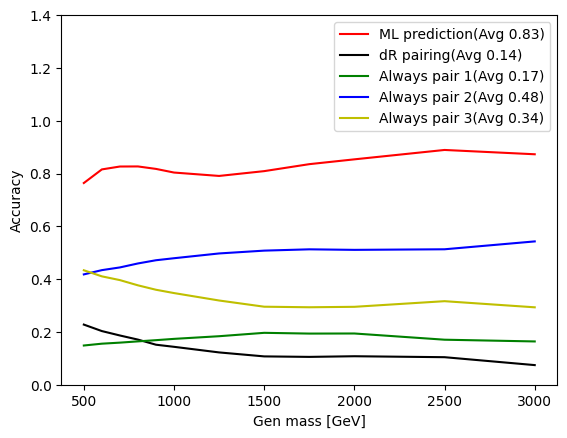

In [118]:
plt.plot(Masses, AccPred, "r", label = "ML prediction(" + AccPredAvg + ")")
plt.plot(Masses, AccdR, "k", label = "dR pairing(" + AccdRAvg + ")")
plt.plot(Masses, Acc0, "g", label = "Always pair 1(" + Acc0Avg + ")")
plt.plot(Masses, Acc1, "b", label = "Always pair 2(" + Acc1Avg + ")")
plt.plot(Masses, Acc2, "y", label = "Always pair 3(" + Acc2Avg + ")")
plt.legend()
plt.xlabel("Gen mass [GeV]")
plt.ylabel("Accuracy")
plt.ylim(0, 1.4)
plt.savefig(ResultsDir + "Accuracy_vs_mass.png")

In [119]:
if SanityCheckPlots:
    P1Mi = TestingDF.columns.get_loc("P1M")
    #TestingDF["dR_M"] = TestingDF.apply(lambda row: row.iloc[row["dRi"]], axis=1)
    TestingDF["dR_M"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1Mi + TestingDF["dRi"]]
    TestingDF["Truth_high_M"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1Mi + TestingDF["Truth_high"]]
    TestingDF["Truth_avg_M"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1Mi + TestingDF["Truth_avg"]]
    TestingDF["Pred_M"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1Mi + TestingDF["Pred"]]
    TestingDF

In [120]:
if SanityCheckPlots:
    # for each gen mass sample, plot average dijet mass
    for Mass in Masses:
        TestingDF_temp = TestingDF.loc[TestingDF["Mass"] == Mass]
        plt.figure()
        plt.hist(TestingDF_temp["Pred_M"], bins = 100, range = [Mass/4, Mass*2], histtype = "step",
                 color = "r", label = "ML prediction")
        plt.hist(TestingDF_temp["dR_M"], bins = 100, range = [Mass/4, Mass*2], histtype = "step",
                 color = "k", label = "dR pairing")
        plt.hist(TestingDF_temp["Truth_high_M"], bins = 100, range = [Mass/4, Mass*2], histtype = "step",
                 color = "g", label = "Truth mass high")
        plt.hist(TestingDF_temp["Truth_avg_M"], bins = 100, range = [Mass/4, Mass*2], histtype = "step",
                 color = "b", label = "Truth mass average")
        plt.legend()
        plt.title("Gen mass " + str(Mass) + " GeV")
        plt.xlabel("Average dijet mass [GeV]")
        plt.ylabel("Events")
        plt.savefig(ResultsDir + "Average_dijet_mass_" + str(Mass) + "GeV.png")

In [121]:
if SanityCheckPlots:
    P1QSMDi = TestingDF.columns.get_loc("P1QSMD")
    TestingDF["dR_QSMD"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1QSMDi + TestingDF["dRi"]]
    TestingDF["Truth_high_QSMD"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1QSMDi + TestingDF["Truth_high"]]
    TestingDF["Truth_avg_QSMD"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1QSMDi + TestingDF["Truth_avg"]]
    TestingDF["Pred_QSMD"] = TestingDF.to_numpy()[np.arange(len(TestingDF)), P1QSMDi + TestingDF["Pred"]]
    TestingDF

In [122]:
if SanityCheckPlots:
    # for each gen mass sample, plot sum (mjj - gen mass)^2
    for Mass in Masses:
        TestingDF_temp = TestingDF.loc[TestingDF["Mass"] == Mass]
        Bins = [10**(x/5) for x in range(5,40)]
        plt.figure()
        plt.hist(TestingDF_temp["Pred_QSMD"], bins = Bins,
                 histtype = "step", color = "r", label = "ML prediction")
        plt.hist(TestingDF_temp["dR_QSMD"], bins = Bins,
                 histtype = "step", color = "k", label = "dR pairing")
        plt.hist(TestingDF_temp["Truth_high_QSMD"], bins = Bins,
                 histtype = "step", color = "g", label = "Truth mass high")
        plt.hist(TestingDF_temp["Truth_avg_QSMD"], bins = Bins,
                 histtype = "step", color = "b", label = "Truth mass average")
        plt.xscale('log')
        plt.legend()
        plt.title("Gen mass " + str(Mass) + " GeV")
        plt.xlabel("sum (mjj - gen mass)^2 [GeV^2]")
        plt.ylabel("Events")
        plt.savefig(ResultsDir + "Quad_sum_mass_diff_" + str(Mass) + "GeV.png")

In [123]:
if SanityCheckPlots:
    TestingDF["Pred_M_high_div_M4j"] = TestingDF["Pred_M_high"] / 1000 / TestingDF["fourjetmasstev"]
    plt.hist2d(TestingDF["fourjetmasstev"], TestingDF["Pred_M_high_div_M4j"],
               bins = 200, range = [[0.5,10], [0.2,0.65]], norm = "log")
    plt.xlabel("fourjetmasstev")
    plt.ylabel("Pred_M_high_div_M4j")
    plt.colorbar()
    plt.savefig(ResultsDir + "Pred_M_high_div_M4j_vs_M4j.png")

In [124]:
if SanityCheckPlots:
    for i, Mass in enumerate(Masses):
        TestingDF_temp = TestingDF.loc[TestingDF["Mass"] == Mass]
        if len(TestingDF_temp.index) == 0: continue
        
        plt.figure()    
        plt.hist2d(TestingDF_temp["fourjetmasstev"], TestingDF_temp["Pred_M_high_div_M4j"],
                   bins = 200, range = [[Mass/1000.0, Mass/1000.0 + 3 + 0.4*i], [0.25,0.65]], norm = "log")
        plt.title("Gen mass " + str(Mass) + " GeV")
        plt.xlabel("fourjetmasstev")
        plt.ylabel("Pred_M_high_div_M4j")
        plt.colorbar()
        plt.savefig(ResultsDir + "Pred_M_high_div_M4j_vs_M4j_" + str(Mass) + "GeV.png")